### ALGORITMO DNN

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from collections import Counter

In [2]:
nombre_csv = 4003
de = pd.read_csv(f'Datos_entrenamiento/{nombre_csv}_e.csv')
dp = pd.read_csv(f'Datos_prueba/{nombre_csv}_p.csv')

In [3]:
# Contamos las ocurrencias de cada nivel de estrés en la nueva columna
conteo_nivel_estresde = de['Nivel_estres_1'].value_counts()
conteo_nivel_estresdp = dp['Nivel_estres_1'].value_counts()
# Mostramos el resultado
print(conteo_nivel_estresde)
print(conteo_nivel_estresdp)

Nivel_estres_1
normal     2904
alerta      408
peligro     120
Name: count, dtype: int64
Nivel_estres_1
normal     2376
alerta       48
peligro      24
Name: count, dtype: int64


In [4]:
# Crear un diccionario para mapear cada categoría única en la columna 'nivel_estres' a un número
mapping = {'normal': 0, 'alerta': 1, 'peligro': 2}
# Mapear las categorías a números utilizando el método map de pandas
de['Nivel_estres_1'] = de['Nivel_estres_1'].map(mapping)
dp['Nivel_estres_1'] = dp['Nivel_estres_1'].map(mapping)
de['Nivel_estres_2'] = de['Nivel_estres_2'].map(mapping)
dp['Nivel_estres_2'] = dp['Nivel_estres_2'].map(mapping)

## MODELO DNN

In [17]:
# Separar características y etiquetas del conjunto de entrenamiento
X_train = de[['period eating','period other','period resting','period rumination']]
y_train = de['Nivel_estres_1']
# Separar características y etiquetas del conjunto de prueba
X_test = dp[['period eating','period other','period resting','period rumination']]
y_test = dp['Nivel_estres_1']

In [18]:
# # Separar características y etiquetas del conjunto de entrenamiento
# X_train = de[['period eating_count','period other_count','period resting_count','period rumination_count']]
# y_train = de['Nivel_estres_2']
# # Separar características y etiquetas del conjunto de prueba
# X_test = dp[['period eating_count','period other_count','period resting_count','period rumination_count']]
# y_test = dp['Nivel_estres_2']

In [19]:
# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir etiquetas a formato categórico
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

In [20]:
# Construir el modelo DNN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['auc'])

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=24, validation_data=(X_test_scaled, y_test_categorical))

Epoch 1/100


143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc: 0.8794 - loss: 0.6753 - val_auc: 0.9816 - val_loss: 0.2302
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9102 - loss: 0.5127 - val_auc: 0.9806 - val_loss: 0.2491
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9018 - loss: 0.5224 - val_auc: 0.9799 - val_loss: 0.2446
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9055 - loss: 0.5155 - val_auc: 0.9818 - val_loss: 0.2360
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9087 - loss: 0.5150 - val_auc: 0.9806 - val_loss: 0.2037
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9060 - loss: 0.5214 - val_auc: 0.9801 - val_loss: 0.2391
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9170 - loss: 0.4816 - val_auc: 0.9804 - val_loss: 0.2498
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9070 - loss: 0.5343 - val_auc: 0.9797 - val_loss: 0.2185
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 

In [22]:
# Predecir las etiquetas para el conjunto de prueba
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [26]:
# Contamos las ocurrencias de cada nivel de estrés
valores_unicos, conteos = np.unique(y_test, return_counts=True)
valores_unicos1, conteos1 = np.unique(y_pred, return_counts=True)
# Combina los valores únicos y sus conteos en un diccionario para facilitar la visualización
ocurrencias = dict(zip(valores_unicos, conteos))
ocurrenciaspre = dict(zip(valores_unicos1, conteos1))
# Mostramos el resultado
#print(conteo_nivel_estres)
print(ocurrencias)
print(ocurrenciaspre)

{0: 2376, 1: 48, 2: 24}
{0: 2441, 1: 7}


# `EVALUACION DEL MODELO `

In [27]:
# EVALUACION DEL MODELO
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcular el AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')

# Mostrar métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.9677287581699346
Precision: 0.9419596597344386
Recall: 0.9677287581699346
F1 Score: 0.9546703464445774
ROC AUC: 0.5191074264158668


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


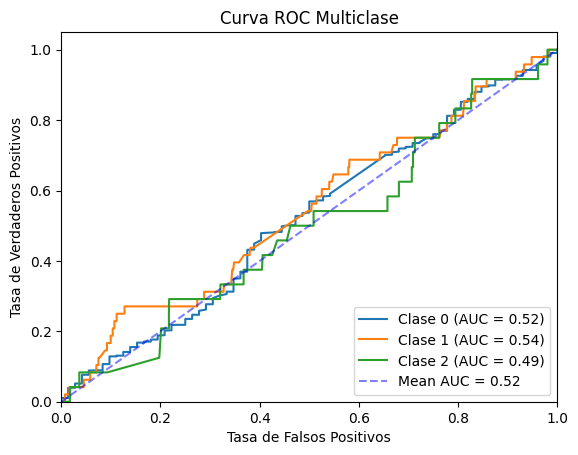

In [28]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

# Extraer los valores
values = roc_auc.values()
# Calcular la media
mean_auc = sum(values) / len(values)

plt.plot([0, 1], [0, 1], 'b--', label=f"Mean AUC = {mean_auc:.2f}", alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc='lower right')
#plt.savefig(f'../Curva_Roc/{nombre_csv}_roc_DNN.png', format='png', dpi=300)
plt.show()